# A2_Data [SAMPLE SOLUTION]

This is a work in progress of the solution to Assignment 2. With that you may follow some steps along the way to the final result. 

The final version will be published by next week (starting 05.29.22)

## Data Acquisition & Data Background

This set has german credit data. It classifies people described by a set of attributes as good or bad credit risks. There are two formats:

german.data (categorical and numeric values), the original dataset by Prof. Hofmann
german.data-numeric (all numeric values), by Strathclyde University for algorithms that use numerical attributes
It is also stated that it is worse to class a customer as good when they are bad, than the other way around.

Attributes

Attribute 1: (qualitative) Status of existing checking account A11 : ... < 0 DM A12 : 0 <= ... < 200 DM A13 : ... >= 200 DM / salary assignments for at least 1 year A14 : no checking account

Attribute 2: (numerical) Duration in month

Attribute 3: (qualitative) Credit history A30 : no credits taken/ all credits paid back duly A31 : all credits at this bank paid back duly A32 : existing credits paid back duly till now A33 : delay in paying off in the past A34 : critical account/ other credits existing (not at this bank)

Attribute 4: (qualitative) Purpose A40 : car (new) A41 : car (used) A42 : furniture/equipment A43 : radio/television A44 : domestic appliances A45 : repairs A46 : education A47 : (vacation - does not exist?) A48 : retraining A49 : business A410 : others

Attribute 5: (numerical) Credit amount

Attibute 6: (qualitative) Savings account/bonds A61 : ... < 100 DM A62 : 100 <= ... < 500 DM A63 : 500 <= ... < 1000 DM A64 : .. >= 1000 DM A65 : unknown/ no savings account

Attribute 7: (qualitative) Present employment since A71 : unemployed A72 : ... < 1 year A73 : 1 <= ... < 4 years
A74 : 4 <= ... < 7 years A75 : .. >= 7 years

Attribute 8: (numerical) Installment rate in percentage of disposable income

Attribute 9: (qualitative) Personal status and sex A91 : male : divorced/separated A92 : female : divorced/separated/married A93 : male : single A94 : male : married/widowed A95 : female : single

Attribute 10: (qualitative) Other debtors / guarantors A101 : none A102 : co-applicant A103 : guarantor

Attribute 11: (numerical) Present residence since

Attribute 12: (qualitative) Property A121 : real estate A122 : if not A121 : building society savings agreement/life insurance A123 : if not A121/A122 : car or other, not in attribute 6 A124 : unknown / no property

Attribute 13: (numerical) Age in years

Attribute 14: (qualitative) Other installment plans A141 : bank A142 : stores A143 : none

Attribute 15: (qualitative) Housing A151 : rent A152 : own A153 : for free

Attribute 16: (numerical) Number of existing credits at this bank

Attribute 17: (qualitative) Job A171 : unemployed/ unskilled - non-resident A172 : unskilled - resident A173 : skilled employee / official A174 : management/ self-employed/ highly qualified employee/ officer

Attribute 18: (numerical) Number of people being liable to provide maintenance for

Attribute 19: (qualitative) Telephone A191 : none A192 : yes, registered under the customers name

Attribute 20: (qualitative) foreign worker A201 : yes A202 : no

## _Rule: Garbage in, Garbage out_

_Before even starting to do any operations on a data-set there, are some best pactises in data sciences how to start off. Just like surgeons know about the diagnosis of a patient and desinfect their hands before starting any operations, we'll check the backgound and make sure to work technically safe._

_No matter what you wanna do with your dataset. Apply a machine learning model on it, use it for a presentation or base any kind of future work on it, you will need to understand your data very well._

### Step 1: Where does the data come from and what will it tell me ?!

To get settled up you can always start with a short but sexy brainstorm:

 - [ ] What do I wanna do with the data?
 - [ ] What do I need to know on the data?
 - [ ] Is there anything important to consider (such as anonymisation, getting back-ups, etc.)


#### Hands-on german_data

From a short loo at the data documentation, we see that a Professor published this data, we know that it is on german credit takers and we get the hint for data usage from a financial perspective. That's all, nothing more. 

#### What would we like to know about the data?
 <ul>
    <li> when was the data taken </li>
    <li> contact person or company/faculty/etc. </li>
    <li> context of data-collection </li>
    <li> and others </li>

### Step 2: Looking at the data! 


#### Do you see what I see about Attribute 9?

Why are there two different categories for divorced / seperated / married for the male participants (A91: male : divorced/seperated, A94: male : married/widowed) and one for the female ones (A92: female : divorced/seperated/married) ??

This can have plenty of reasons, such as professional error when acquiring the data and without any rational reason. It can also mean that it is assumed that divorced or seperated man would have to take care of the former partner, while women would not have to do that. But this information is also taken into account by attribute 18. These are just examples of why there is this inconsistency with the data. Any ways it is very important to know the causes of the inconsistency in order to control for it. Therefor it would be cool to contact someone who knows more on the data set and find out what is behind this attribute 9?


#### What else can we see? 

Since the raw dataset for the german credit data is very hard to read for a humans brain, we'll do a quick preprocessing of the data in order to read it better. 

In [164]:
import pandas as pd

# Add header with attributes
german_credit_columns = ['checking account', 
                         'duration in month', 
                         'credit history', 
                         'credit purpose', 
                         'credit amount', 
                         'savings account', 
                         'employment since..', 
                         'installment rate', 
                         'status : sex', 
                         'other debtors / guarantors', 
                         'residence since', 
                         'property', 
                         'relationship : age', 
                         'other installment plans', 
                         'housing', 
                         'existing credits', 
                         'job', 
                         'people to provide maintenance for', 
                         'telephone', 
                         'foreign worker', 
                         'goodness' ]


# Transform the german.data file into CSV file format
# For errorless reading of data from the web
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Read data
german_credit = pd.read_csv('german.data', 
                            sep=' ', names = german_credit_columns, header = None)


german_credit.head()

,checking account,duration in month,credit history,credit purpose,credit amount,savings account,employment since..,installment rate,status : sex,other debtors / guarantors,...,property,relationship : age,other installment plans,housing,existing credits,job,people to provide maintenance for,telephone,foreign worker,goodness
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [165]:
# Convert all categorical data points into something more human-understandable, e.g. A42 -> furniture/equipment.

german_credit = german_credit.replace({
                              "A11": "negative",
                              "A12": " 0 <= ... <= 200",
                              "A13": "200 < ...",
                              "A14": "none",

                              "A30": "none OR duly paid",
                              "A31": "duly paid",
                              "A32": "existing AND duly paid",
                              "A33": "delayed",
                              "A34": "critical account",

                              "A40": "car (new)",
                              "A41": "car (used)",
                              "A42": "furniture",
                              "A43": "radio OR tv",
                              "A44": "domestic appliances",
                              "A45": "repairs",
                              "A46": "education",
                              "A47": "vacation",
                              "A48": "retraining",
                              "A49": "business",
                              "A410": "other",

                              "A61": " ... < 100",
                              "A62": "100 <= ... < 500",
                              "A63": "500 <= ... < 1000",
                              "A64": "1000 <= ...",
                              "A65": "unknown OR no savings account",

                              "A71": "unemployed",
                              "A72": " ... < 1y",
                              "A73": "1 <= ... < 4y",
                              "A74": "4 <= ... < 7y",
                              "A75": "7y <= ...",

                              "A91": "male : separated OR divorced",
                              "A92": "female : married OR separated OR divorced",
                              "A93": "male : single",
                              "A94": "male : married",
                              "A95": "female : single",

                              "A101": "none",
                              "A102": "co-applicant",
                              "A103": "guarantor",

                              "A121": "real estate",
                              "A122": "society savings agreement OR life insurance", #???
                              "A123": "car OR other",
                              "A124": "none OR unknown",

                              "A141": "bank",
                              "A142": "stores",
                              "A143": "none",

                              "A151": "rent",
                              "A152": "own",
                              "A153": "for free",

                              "A171": "unemployed OR unskilled - non-resident",
                              "A172": "unskilled - resident",
                              "A173": "skilled employed OR official ",
                              "A174": "management OR self-employed OR highly qualified employee OR officer",

                              "A191": "no",
                              "A192": "yes",

                              "A201": "yes",
                              "A202": "no",
                               })

german_credit = german_credit.replace({"goodness": 2}, "no")
german_credit = german_credit.replace({"goodness": 1}, "yes")

german_credit

,checking account,duration in month,credit history,credit purpose,credit amount,savings account,employment since..,installment rate,status : sex,other debtors / guarantors,...,property,relationship : age,other installment plans,housing,existing credits,job,people to provide maintenance for,telephone,foreign worker,goodness
0,negative,6,critical account,radio OR tv,1169,unknown OR no savings account,7y <= ...,4,male : single,none,...,real estate,67,none,own,2,skilled employed OR official,1,yes,yes,yes
1,0 <= ... <= 200,48,existing AND duly paid,radio OR tv,5951,... < 100,1 <= ... < 4y,2,female : married OR separated OR divorced,none,...,real estate,22,none,own,1,skilled employed OR official,1,no,yes,no
2,none,12,critical account,education,2096,... < 100,4 <= ... < 7y,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,no,yes,yes
3,negative,42,existing AND duly paid,furniture,7882,... < 100,4 <= ... < 7y,2,male : single,guarantor,...,society savings agreement OR life insurance,45,none,for free,1,skilled employed OR official,2,no,yes,yes
4,negative,24,delayed,car (new),4870,... < 100,1 <= ... < 4y,3,male : single,none,...,none OR unknown,53,none,for free,2,skilled employed OR official,2,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,none,12,existing AND duly paid,furniture,1736,... < 100,4 <= ... < 7y,3,female : married OR separated OR divorced,none,...,real estate,31,none,own,1,unskilled - resident,1,no,yes,yes
996,negative,30,existing AND duly paid,car (used),3857,... < 100,1 <= ... < 4y,4,male : separated OR divorced,none,...,society savings agreement OR life insurance,40,none,own,1,management OR self-employed OR highly qualifie...,1,yes,yes,yes
997,none,12,existing AND duly paid,radio OR tv,804,... < 100,7y <= ...,4,male : single,none,...,car OR other,38,none,own,1,skilled employed OR official,1,no,yes,yes
998,negative,45,existing AND duly paid,radio OR tv,1845,... < 100,1 <= ... < 4y,4,male : single,none,...,none OR unknown,23,none,for free,1,skilled employed OR official,1,yes,yes,no


In [166]:
# Save the pre-processed dataset into a CSV file
german_credit.to_csv('../A2_Data/german_data_preprocessed.csv', index = False)

## Data Analysis

We need data analysis for several things, such as: 
    <ul>
    <li> researching hypotheses </li>
    <li> generate reports based on available data </li>
    <li> improvement of business strategies </li>
    <li> understand needs of humans and social groups better </li>
    <li> ... </li>
    </ul>
    
Generally it is divided into four fields of data analysis: __descriptive, [exploratory](https://en.wikipedia.org/wiki/Exploratory_data_analysis), contextual and inferential data analysis__. 

For now, we focus on two of them: descriptive and explorative data analysis.   

### Exploratory data analysis (univariate)

This "is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods." [wikipedia](https://en.wikipedia.org/wiki/Exploratory_data_analysis)

In [167]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
#import matplotlib.patches as mpatches



In [168]:
# Split features into categorical and numerical, print numerical
dtype = german_credit.dtypes
numerical_features = dtype[dtype == 'int64'].index
categorical_features = dtype[dtype == 'object'].index

german_credit[numerical_features].describe()

,duration in month,credit amount,installment rate,residence since,relationship : age,existing credits,people to provide maintenance for
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


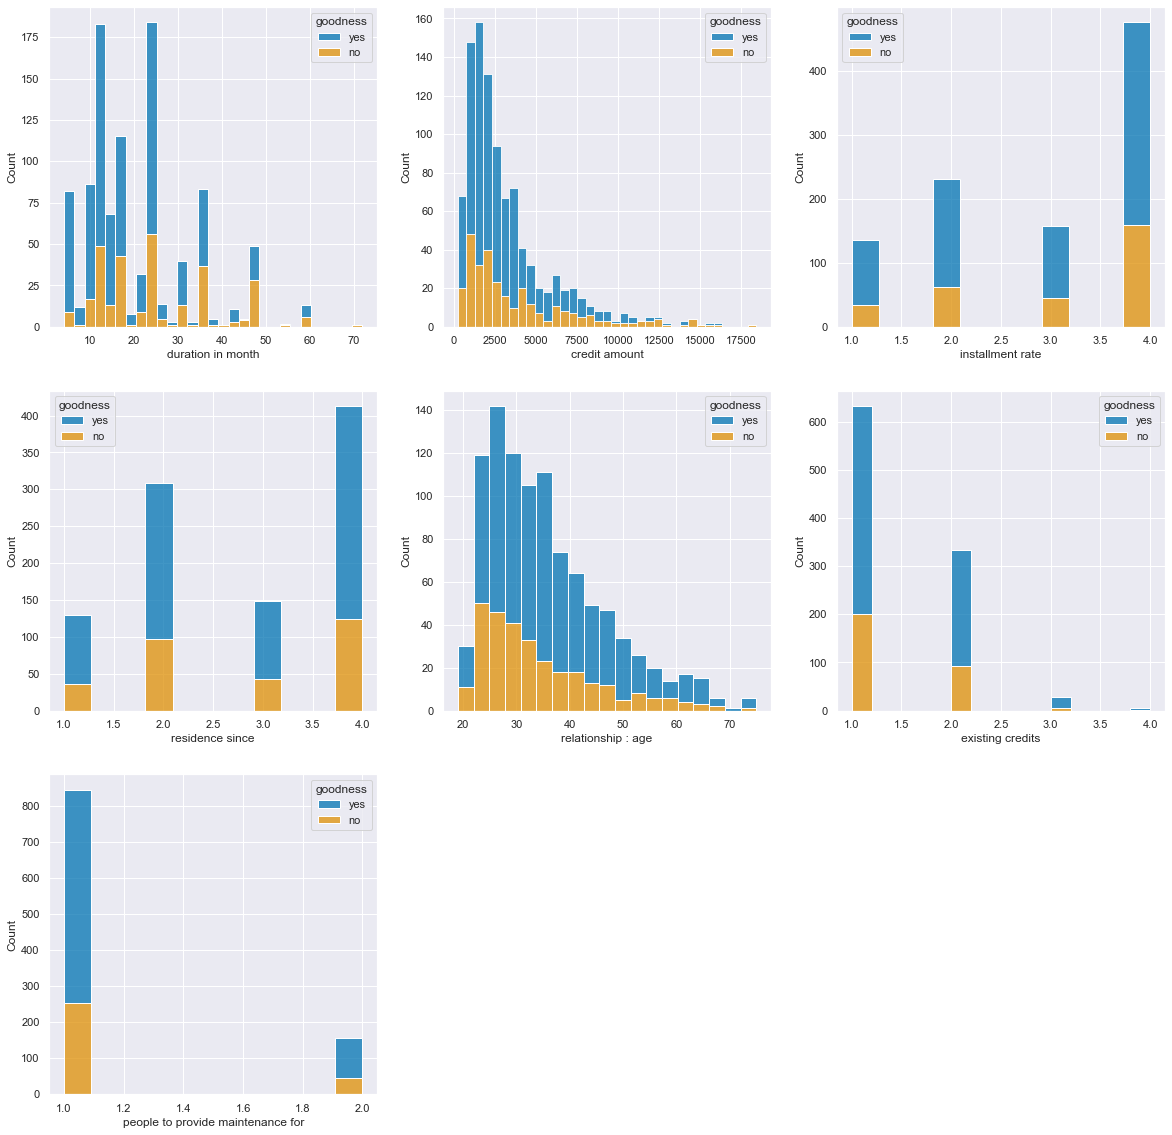

In [169]:
# Plot function for hitogram
## grid => gridspec, plot_type => str
def explorative_analysis (input_data, features, plot_type, plot, grid):
    ax ={}
    for i in range(len(features)):
        ax[i] = plot.add_subplot(grid[i])
        if plot_type == 'hist':
            sns.histplot(x=features[i], data=input_data, hue = input_data["goodness"], stat="count", multiple="stack")
            
# Plot numerical features as histograms
fig = plt.figure(figsize=(20,20))
grid = gridspec.GridSpec(3,3)
explorative_analysis(german_credit, numerical_features, 'hist', fig, grid)

In [170]:
# categorical features as barplots
# parameters for graphs
sns.set_context("poster")
# default figure size
sns.set(rc={'figure.figsize': (12, 6)})
# plot graph style
sns.set_style("darkgrid")
# color palette
sns.set_palette('colorblind')

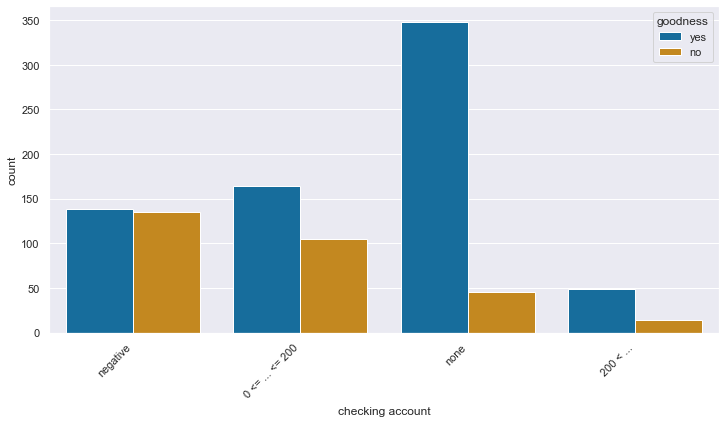

In [171]:
# checking account
sns.countplot(x=german_credit['checking account'],hue=german_credit["goodness"])
plt.xticks(rotation=45, ha='right')
plt.show()

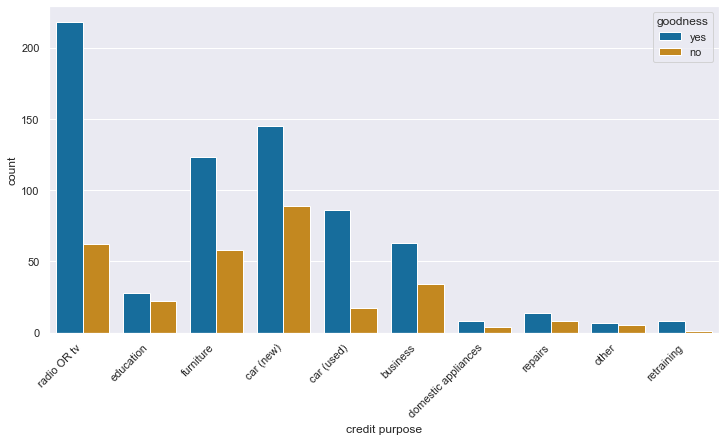

In [132]:
# Credit Purposes

sns.countplot(x=german_credit["credit purpose"],hue=german_credit["goodness"])
plt.xticks(rotation=45, ha='right')
plt.show()

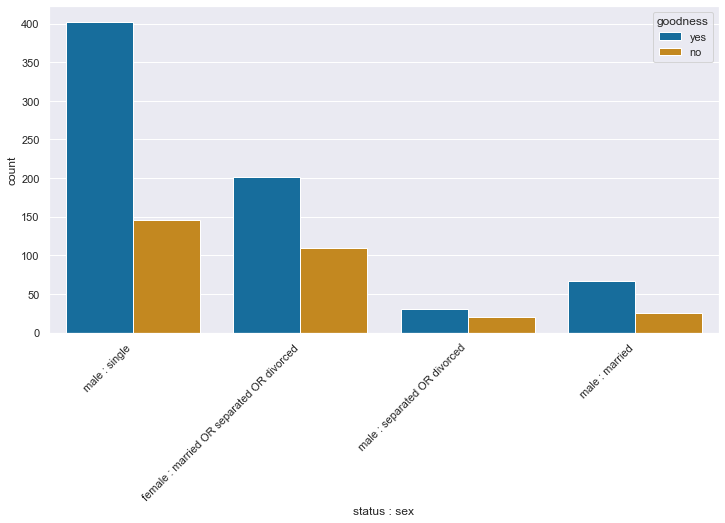

In [135]:
# relationship status & sex
sns.countplot(x=german_credit["status : sex"],hue=german_credit["goodness"])
plt.xticks(rotation=45, ha='right')
plt.show()

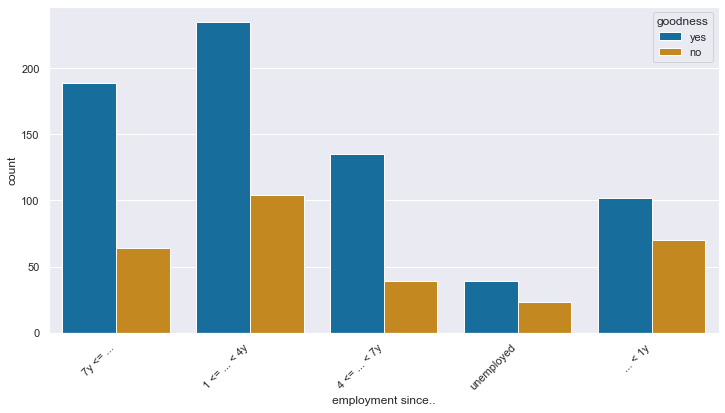

In [138]:
# employment

sns.countplot(x=german_credit["employment since.."],hue=german_credit["goodness"])
plt.xticks(rotation=45, ha='right')
plt.show()

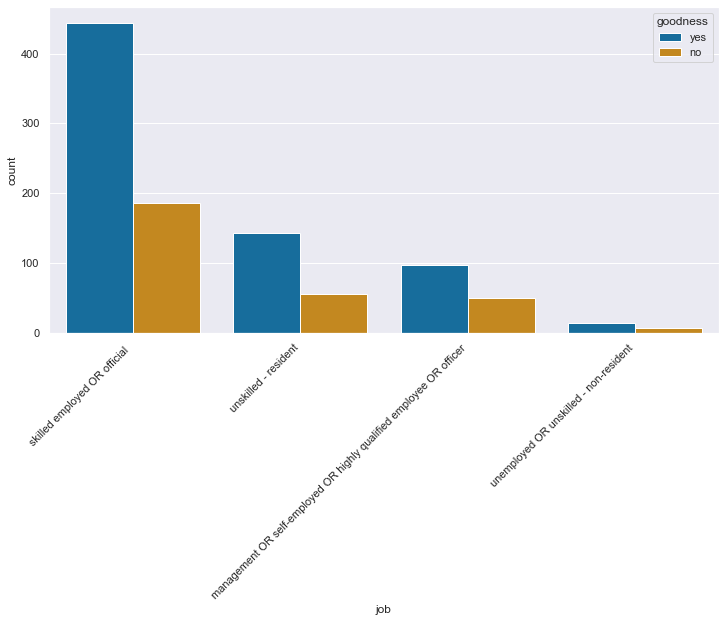

In [139]:
# job
sns.countplot(x=german_credit["job"],hue=german_credit["goodness"])
plt.xticks(rotation=45, ha='right')
plt.show()

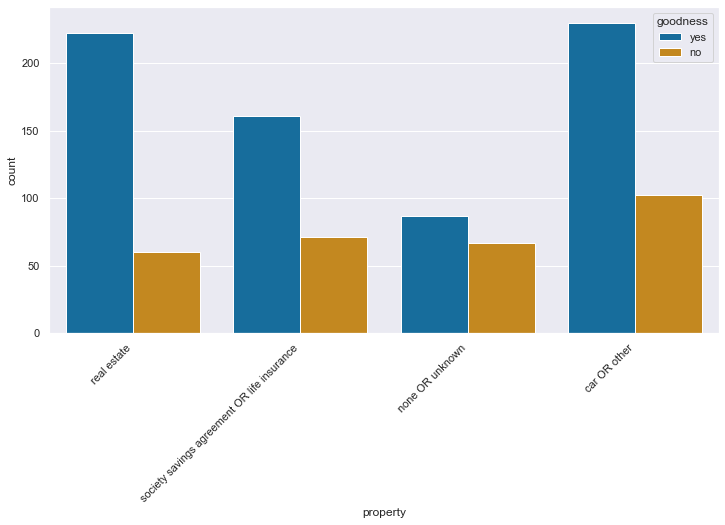

In [146]:
# property
sns.countplot(x=german_credit["property"],hue=german_credit["goodness"])
plt.xticks(rotation=45, ha='right')
plt.show()

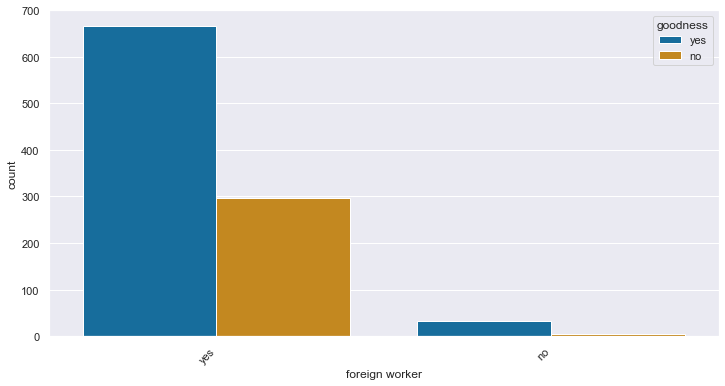

In [140]:
sns.countplot(x=german_credit["foreign worker"],hue=german_credit["goodness"])
plt.xticks(rotation=45, ha='right')
plt.show()

In [147]:
values = german_credit['foreign worker'].value_counts().to_list()
print("Percentage of foreign workers:", (values[0]/german_credit.shape[0])*100, '%')

Percentage of foreign workers: 96.3 %


#### Hmmm - How do we continue with that ?
 
Google Research

#### What do we find?

"The widely used Statlog German credit data ([[Web Link](german+credit+data)]), as of November 2019, suffers from severe errors in the coding information and does not come with any background information. The 'South German Credit' data provide a correction and some background information, based on the Open Data LMU (2010) representation of the same data and several other German language resources." [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/South+German+Credit+%28UPDATE%29)


#### Did you get interested on what's behind this data-set? 

then you can check [this publication on the german credit data set](http://www1.beuth-hochschule.de/FB_II/reports/Report-2019-004.pdf) out

Let's continue with the data analysis..

### _Exploratory analysis (bivariate)_ 

#### _Covariance analysis (numerical features)_

Here, w'll ask for the distribution of the several features to the explanatory content within the whole data set. That means with the coviariance that we find, we are looking for a previous step to a statistical correlation: if two attributes are correlated postively they'd have a covariance > 0. Having a positive covariance would mean that both variables deviate either negatively ot positively on average.


<AxesSubplot:>

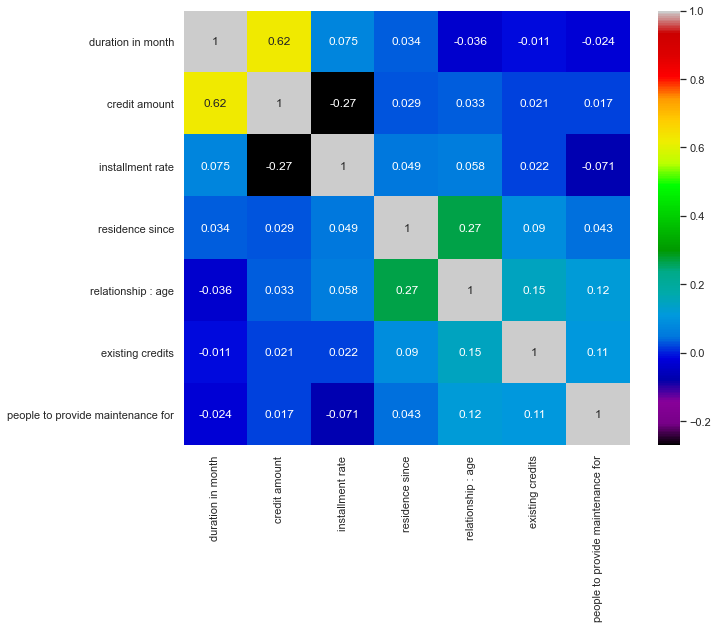

In [161]:
# for the coloring, we tried to find one that is adaptable for people with different colorblindnesses
# the solution might be improved, although a good solution is important, since this map is not differentiable
# via shape and size 

plt.figure(figsize=(10,8))
sns.heatmap(german_credit.select_dtypes(exclude='object').corr(), cmap='nipy_spectral', annot=True)

#### Chi-square (categorical attributes)

Chi-square proofs the hypotheses of our analysis, if the [Null-Hypotheses](https://en.wikipedia.org/wiki/Chi-squared_test) has to be accepted or not regarding the dataset. 

If we accept a Nullhypotheses, this factor is not relevant for the explainability within the data. 

In [163]:
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency

categorical_features = pd.DataFrame(german_credit, columns=['checking account',
        'credit history',
        'credit purpose',
        'savings account',
        'employment since..',
        'status : sex',
        'other debtors / guarantors',
        'residence since',
        'property',
        'installment plans',
        'housing',
        'job',
        'telephone',
        'foreign worker',
        'goodness'])

features = ['checking account',
        'credit history',
        'credit purpose',
        'savings account',
        'employment since..',
        'status : sex',
        'other debtors / guarantors',
        'residence since',
        'property',
        'installment plans',
        'housing',
        'job',
        'telephone',
        'foreign worker',
        'goodness']

for f in features:
    X= categorical_features[f].astype(str)
    Y= categorical_features["goodness"].astype(str)
    observed_features = pd.crosstab(Y,X)
    chi2, pval, dof, expected = stats.chi2_contingency(observed_features.values)

    if pval<0.05:
        print("{0} is IMPORTANT \n".format(f))
    else:
        print("{0} is NOT IMPORTANT \n".format(f))

checking account is IMPORTANT 

credit history is IMPORTANT 

credit purpose is IMPORTANT 

savings account is IMPORTANT 

employment since.. is IMPORTANT 

status : sex is IMPORTANT 

other debtors / guarantors is IMPORTANT 

residence since is NOT IMPORTANT 

property is IMPORTANT 

installment plans is NOT IMPORTANT 

housing is IMPORTANT 

job is NOT IMPORTANT 

telephone is NOT IMPORTANT 

foreign worker is IMPORTANT 

goodness is IMPORTANT 



At this point we get another proof of our intuition that the factors property and foreign worker must be an important. If there would be no evidence for a correlation between thos two factors, we might not claim a problem with the dataset. [...]

### Multivariate Statistics

t.b.a